In [1]:
import openpathsampling as p
from IPython.display import SVG
import openpathsampling.visualize as vis

Load the results from the example toy simulation stored in `mstis.nc`

In [2]:
st = p.Storage('mstis.nc', mode='r')

Load the first (and only) scheme we used in the process. We want to have a look at what it does.

In [3]:
scheme = st.schemes.first

In [4]:
reload(vis)

<module 'openpathsampling.visualize' from '/Users/dwhs/Dropbox/msm-tis/openpathsampling/visualize.pyc'>

Create the builder using a factory function. You can do it directly but this way it is faster and easier.

In [5]:
builder = vis.MoveTreeBuilder.from_scheme(scheme)

#### Options

##### Analysis

The most used option is to specify if canonical moves should be collapsed or shown. Default is collapsed so canonical moves are display as a single move (although internally they might do several other canonical moves themselves).

This is to completely show the canonical moves, in our case the MinusMoves

In [6]:
builder.options.analysis['only_canonical'] = False

Show the mover. You see a tree depicting the dependency on the left side. The higher levels (more to the left) run independently of lower levels. This is the way the moves are constructed and allow for better analysis and reusing of submoves. On the right you see a list of ensembles and which ensembles are affected by a specific mover. Green indicates that a sample from this ensemble _might_ be used as input for the move. "Might" means that there is a possibility given the context (see below) and the specific mover that a sample in the ensemble is requested and thus necessary to not cause a RuntimeError. Input usually means that a sample is also remove from this ensemble (although the final ensembles can be the same). A red color similar indicates that a sample will be placed in this ensemble (usually taken from the input ensembles). In almost all cases the samples from the input are removed, optionally altered and placed in the output ensembles.  

If a mover really affects an ensembles depends on two things:

1. The definition of the mover itself. So a shooting mover has one specific ensembles if shoots it. A RepEx move has two ensembles, etc. 
2. The second is the context (the sampleset that is moved). 

##### What is this context ?

This is difficult to understand and depends on the fact that during a simulation an ensembles can be occupied by more than one samples at a time. (Note that replicas are unique). This means that two subsequent moves might act on different replicas in the same ensemble. As an example consider two shoots in ensemble A. You might think that both moves combined will pick the samples from A and move it twice and finally there is again a sample in A. If you start with two samples in A. Then both moves might pick different samples and the combined move actually does take two separate samples and move each once. This is the effect of the context. In most cases we run with one sample per ensemble max. This will be the default setting if this context is not specified. In most cases you specify the context by giving an initial sampleset and the MoveTreeBuilder will figure out all possible contexts for each submover and use that context.

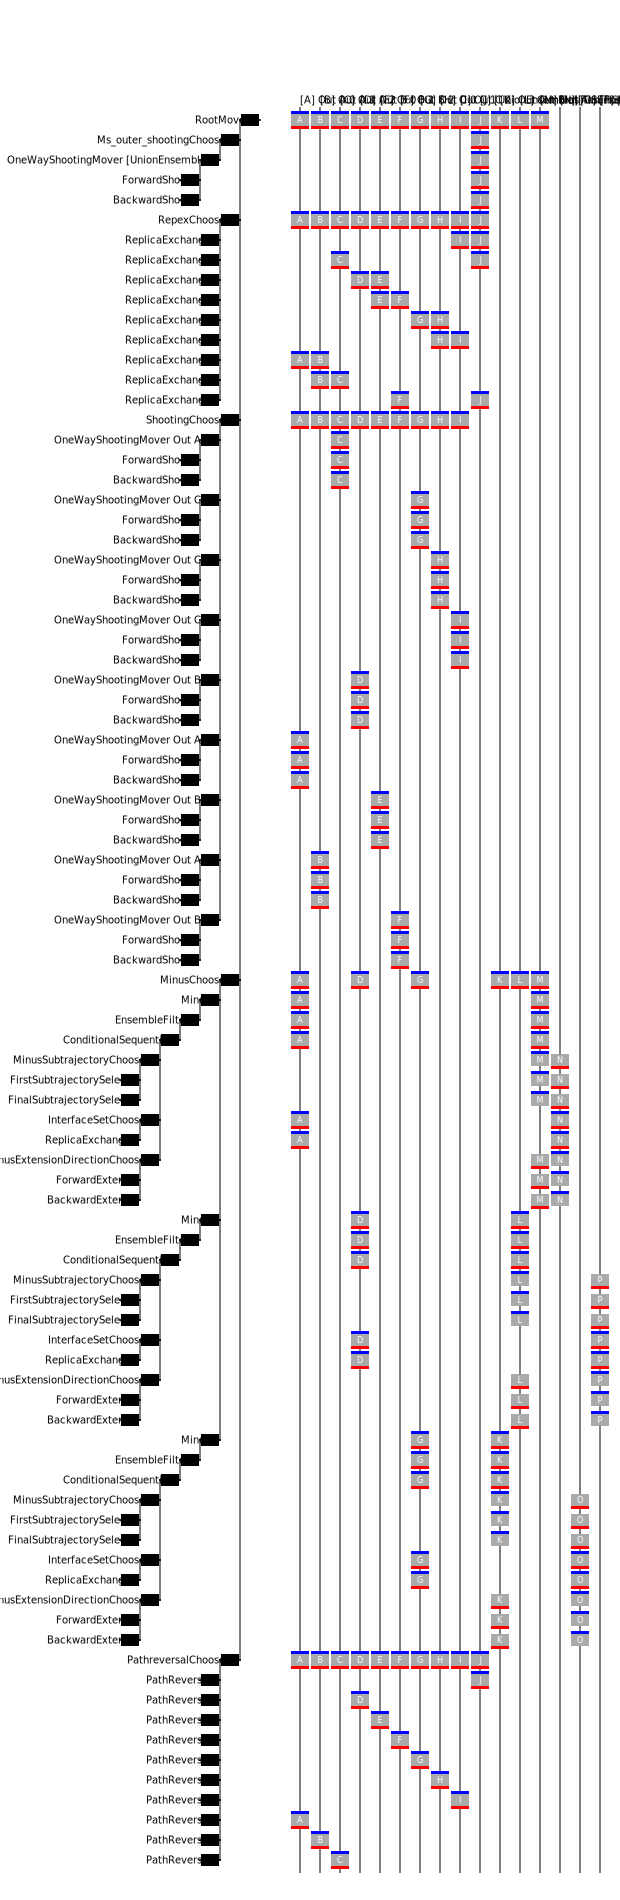

In [7]:
SVG(builder.svg())

In the minus moves you see that a sample is shifted to a hidden ensembles, then swapped and moved back.

##### Inspection

Inspection is still an experimental feature and might change in the future. As an example we want to know what we need to use as a sampleset to run the mover safely.

A Pathmover has a `.in_out` objects that keeps the information on all possible changes in replicas. We can ask for the minimal set of inputs `.ins_minimal`. There are more functions that we are not going to explain here, but in a future larger tutorial on pathmove inspection.

In [8]:
minimal = dict(scheme.root_mover.in_out.ins_minimal)
minimal

{<openpathsampling.ensemble.MinusInterfaceEnsemble at 0x11323dad0>: 1,
 <openpathsampling.ensemble.MinusInterfaceEnsemble at 0x113986190>: 1,
 <openpathsampling.ensemble.MinusInterfaceEnsemble at 0x113a9ba10>: 1,
 <openpathsampling.ensemble.TISEnsemble at 0x105c5f210>: 1,
 <openpathsampling.ensemble.TISEnsemble at 0x107232510>: 1,
 <openpathsampling.ensemble.TISEnsemble at 0x10c830790>: 1,
 <openpathsampling.ensemble.TISEnsemble at 0x110935b90>: 1,
 <openpathsampling.ensemble.TISEnsemble at 0x11095b910>: 1,
 <openpathsampling.ensemble.TISEnsemble at 0x11095bb90>: 1,
 <openpathsampling.ensemble.TISEnsemble at 0x113229f90>: 1,
 <openpathsampling.ensemble.TISEnsemble at 0x113956810>: 1,
 <openpathsampling.ensemble.TISEnsemble at 0x11397bfd0>: 1,
 <openpathsampling.ensemble.UnionEnsemble at 0x113968a50>: 1}

And compare if the scheme will actually match the requirements

In [9]:
all(ens in minimal for ens in scheme.list_initial_ensembles())

True

Checking for equality (neglecting multiplicity since we only have a single sample per ensemble in our case)

In [10]:
set(minimal) == set(scheme.list_initial_ensembles())

True